<a href="https://colab.research.google.com/github/saadakhtar312/IJMST_project/blob/main/MC_code_IJMST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import sys
%matplotlib inline
np.set_printoptions(threshold=sys.maxsize)

In [ ]:
## Function for defining MonteCarlo cases

def MonteCarlo_cases(n):

  # Inlet temperature

  Temp_in_max = -25 + 273 # Max inlet temperature [K]
  Temp_in_min = -35 + 273  # Min inlet temp [K]
  Temp_SD = 1.8 # Standard deviation
  Temp_in = np.random.normal( (Temp_in_max + Temp_in_min)/2, 
                          Temp_SD, n) # generate the random normal dist

  # Flow rate

  FL_max = 1.5  # Max flow rate [m3/hr]
  FL_min = 3.5  # Min flow rate [m3/hr]
  FL_SD = 0.35     # Standard deviation
  FL = np.random.normal( (FL_max + FL_min)/2, 
                          FL_SD, n) # generate the random normal dist

  # Epsilon

  eps_max = 0.1  # Max epsilon [-]
  eps_min = 0.9  # Min epsilon [-]
  eps = np.random.uniform( eps_min, eps_max, n) # generate the random uniform dist

  # Diameter

  dia_max = 100  # Max dia [cm]
  dia_min = 0.9  # Min dia [cm]
  dia = np.random.uniform( dia_min, dia_max, n) # generate the random uniform dist

  # Combining all 4 parameters
  
  MC_cases = np.zeros((n,4))

  for i in np.arange(0,n):
    MC_cases[i,0] = Temp_in[i]
    MC_cases[i,1] = FL[i]
    MC_cases[i,2] = eps[i]
    MC_cases[i,3] = dia[i]

  return MC_cases


In [ ]:
## Saving the output in csv

sample_size = 1000
d = MonteCarlo_cases(sample_size)
file_name = "MC_cases_" + str(sample_size) + ".csv"
np.savetxt(file_name, d, delimiter=",")

Text(0.5, 0, 'Diameter [cm]')

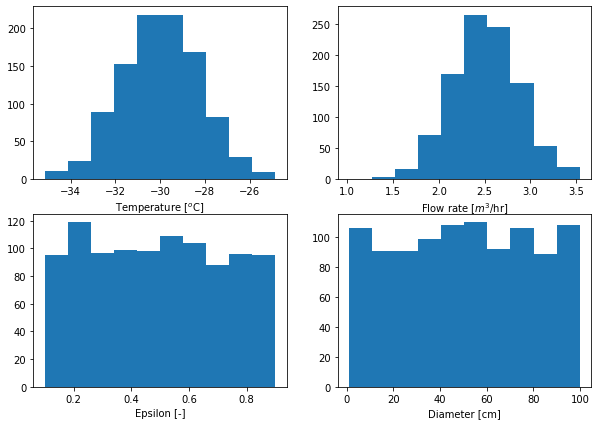

In [ ]:
# Distribution plots

fig, ax = plt.subplots(nrows=2, ncols=2, figsize = (10,7))

ax[0,0].hist(d[:,0]-273)
ax[0,1].hist(d[:,1])
ax[1,0].hist(d[:,2])
ax[1,1].hist(d[:,3])

ax[0,0].set_xlabel('Temperature [$^o$C]')
ax[0,1].set_xlabel('Flow rate [$m^3$/hr]')
ax[1,0].set_xlabel('Epsilon [-]')
ax[1,1].set_xlabel('Diameter [cm]')